In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams.update({"font.size":20})

# Read Data

In [3]:
temp = pd.read_csv("../Datasets/land_temp_by_state.csv")

In [4]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7803 entries, 0 to 7802
Data columns (total 4 columns):
dt                             7803 non-null object
avg_temperature                7801 non-null float64
avg_temperature_uncertainty    7801 non-null float64
state_name                     7803 non-null object
dtypes: float64(2), object(2)
memory usage: 243.9+ KB


In [5]:
temp.head()

,dt,avg_temperature,avg_temperature_uncertainty,state_name
0,2001-01-01,5.358,0.161,Alabama
1,2001-02-01,11.583,0.177,Alabama
2,2001-03-01,11.185,0.135,Alabama
3,2001-04-01,18.517,0.129,Alabama
4,2001-05-01,21.985,0.158,Alabama


In [7]:
def to_year(timestamp):
    try:
        return int(timestamp[:4])
    except:
        return None

In [8]:
temp['year'] = temp["dt"].apply(to_year)

In [14]:
temp_by_state_year = temp.groupby(["state_name", "year"])['avg_temperature'].mean().reset_index()

In [26]:
temp_by_state_year.head()

,state_name,year,avg_temperature
0,Alabama,2001,17.677750
1,Alabama,2002,18.022167
2,Alabama,2003,17.513167
3,Alabama,2004,17.838500
4,Alabama,2005,17.857250


In [25]:
top10_coal_power = ['Texas', u'Indiana', u'Ohio', u'Illinois', u'Kentucky',
       u'West Virginia', u'Pennsylvania', u'North Carolina', u'Florida',
       u'Missouri']

bottom10_coal_power = ['Delaware', u'Connecticut', u'Alaska', u'California', u'Idaho',
       u'Kansas', u'Vermont', u'Rhode Island', u'Hawaii', u'Maine']

In [47]:
for state in temp_by_state_year["state_name"].unique():
    temp_by_state_year.loc[temp_by_state_year["state_name"] == state, "avg_temperature"] -= temp_by_state_year.loc[temp_by_state_year["state_name"] == state, "avg_temperature"].iloc[0]

In [48]:
top10_temp = temp_by_state_year[temp_by_state_year["state_name"].isin(top10_coal_power)].groupby("year")["avg_temperature"].mean()
top_10_temp_std = temp_by_state_year[temp_by_state_year["state_name"].isin(bottom10_coal_power)].groupby("year")["avg_temperature"].std()

In [49]:
bottom_10_temp = temp_by_state_year[temp_by_state_year["state_name"].isin(bottom10_coal_power)].groupby("year")["avg_temperature"].mean()
bottom_10_temp_std = temp_by_state_year[temp_by_state_year["state_name"].isin(bottom10_coal_power)].groupby("year")["avg_temperature"].std()

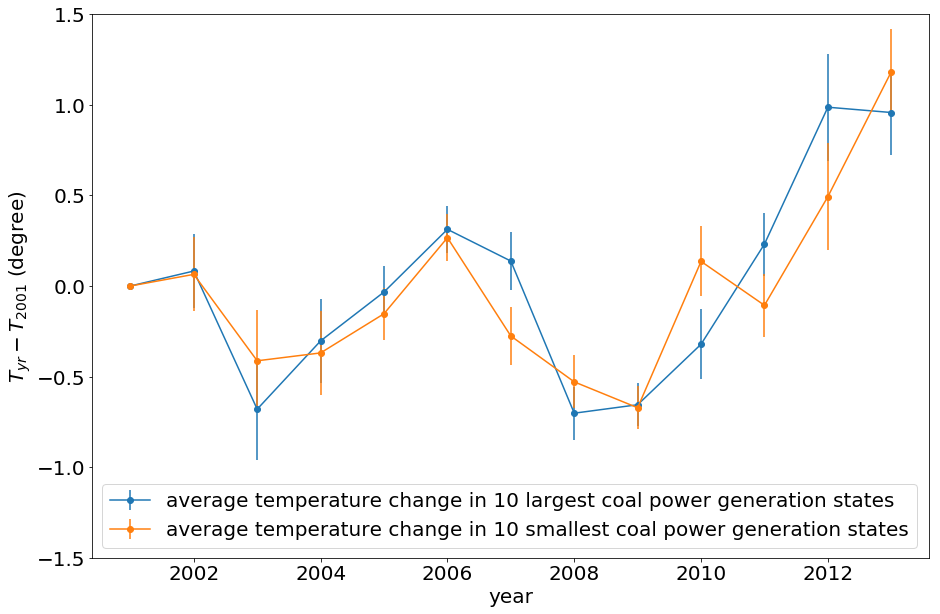

In [57]:
plt.figure(figsize=(15,10))
plt.errorbar(top10_temp.index, top10_temp - top10_temp.iloc[0], yerr=top_10_temp_std/3, marker='o', label="average temperature change in 10 largest coal power generation states")
plt.errorbar(bottom10_temp.index, bottom_10_temp- bottom_10_temp.iloc[0],yerr=bottom_10_temp_std/3, marker='o', label="average temperature change in 10 smallest coal power generation states")
    
plt.xlabel("year")
plt.ylabel("$T_{yr} - T_{2001}$ (degree)")
plt.ylim((-1.5, 1.5))
plt.legend()
plt.savefig("../plots/temperature.png", dpi = 200)